## IN4640 Assignment 1
### Intensity Transformations and Neighborhood Filtering
### Task 04

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

Otsu's Threshold Value: 101.0


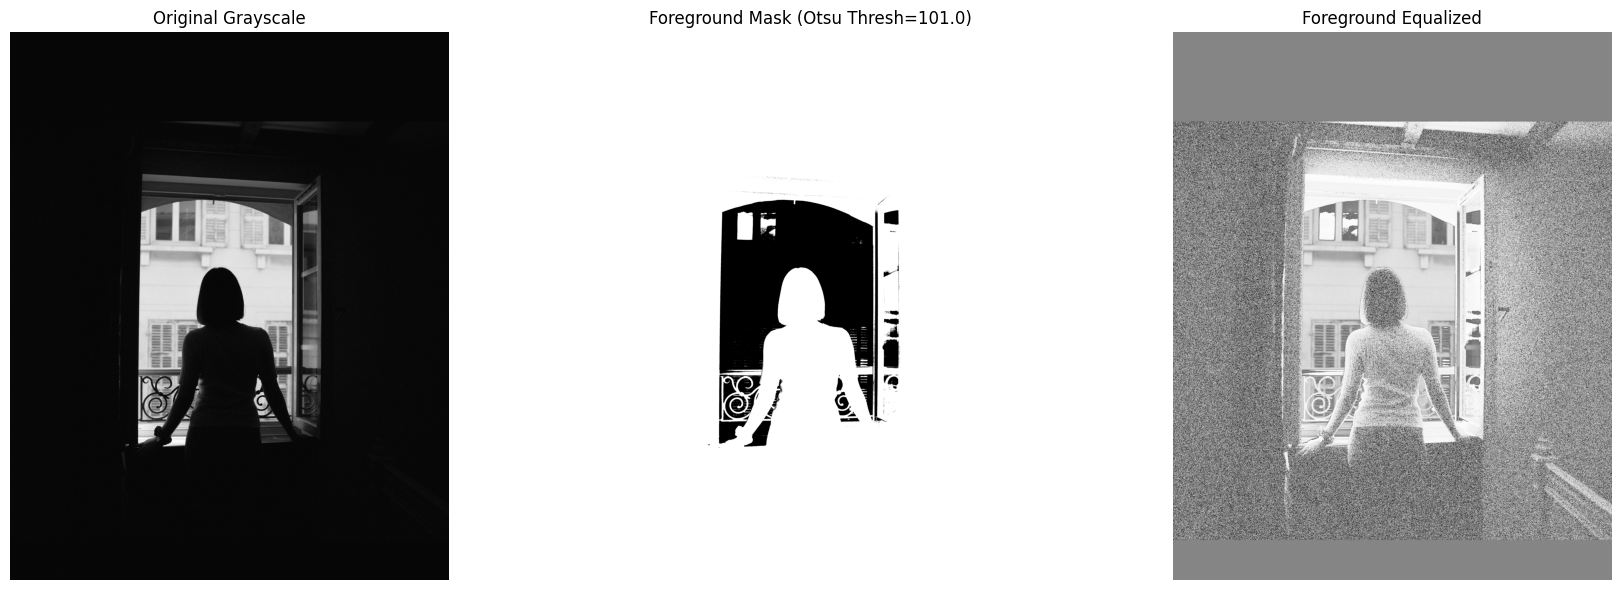

In [3]:
img_path = 'assets/looking_out.jpg'

if not os.path.exists(img_path):
    print(f"Error: File not found at {img_path}")
else:
    img_bgr = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    
    ret, mask = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    print(f"Otsu's Threshold Value: {ret}")
    
    def equalize_masked_region(image, region_mask):
        valid_pixels = image[region_mask == 255]
        hist, bins = np.histogram(valid_pixels.flatten(), 256, [0, 256])
        cdf = hist.cumsum()
        cdf_normalized = cdf * hist.max() / cdf.max()
        cdf_m = np.ma.masked_equal(cdf, 0)
        cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
        cdf_final = np.ma.filled(cdf_m, 0).astype('uint8')
        equalized_img = image.copy()
        equalized_img[region_mask == 255] = cdf_final[image[region_mask == 255]]
        return equalized_img

    result_img = equalize_masked_region(img_gray, mask)

    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.title("Original Grayscale")
    plt.imshow(img_gray, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title(f"Foreground Mask (Otsu Thresh={ret})")
    plt.imshow(mask, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Foreground Equalized")
    plt.imshow(result_img, cmap='gray')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()